In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol
import os
result_folder = "results/dev_test-1/task_15_repeat-5_25000_2.0_298.0k_gaff-2.11"
sdf_file = os.path.join(result_folder, "relaxed_chain.sdf")
smiles = ""
smiles_path = os.path.join(result_folder,"psmiles.txt")
with open(smiles_path,"r") as f:
    smiles = f.readline()
mol_H  = Chem.MolFromMolFile(sdf_file, removeHs=False)  # 保留H
mol_noH = Chem.RemoveHs(mol_H, updateExplicitCount=True)
%load_ext autoreload
%autoreload 2

In [3]:
mol_H.GetNumAtoms()

167

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image
from io import BytesIO

def visualize_monomer_matches_from_matches(mol_H, matches, max_matches=10):
    """
    给定聚合物分子 mol_H 和已知匹配原子编号列表 matches，进行可视化。
    每个匹配高亮不同颜色，并标注原子编号。
    """
    print(f"输入匹配数: {len(matches)}")

    if not matches:
        return None

    matches = matches[:max_matches]

    # 配置颜色
    highlight_atoms = []
    highlight_atom_map = {}
    colors = [(1.0, 0.3, 0.3), (0.3, 0.3, 1.0), (0.2, 0.6, 0.2),
              (0.8, 0.5, 0.0), (0.5, 0.0, 0.8), (0.8, 0.8, 0.0),
              (0.0, 0.6, 0.6), (0.6, 0.0, 0.6), (0.6, 0.3, 0.1)]

    for i, match in enumerate(matches):
        c = colors[i % len(colors)]
        for idx in match:
            highlight_atoms.append(idx)
            highlight_atom_map[idx] = c
            mol_H.GetAtomWithIdx(idx).SetProp("atomNote", str(idx))  # 可显示编号

    # 绘图
    drawer = rdMolDraw2D.MolDraw2DCairo(800, 800)
    drawer.DrawMolecule(
        mol_H,
        highlightAtoms=highlight_atoms,
        highlightAtomColors=highlight_atom_map
    )
    drawer.FinishDrawing()
    img_data = drawer.GetDrawingText()
    return Image.open(BytesIO(img_data))

In [5]:
from utils.monomer_utils import extract_monomers
filled_index_clean, matches_H, matches_with_H,map_noH_to_H,keypoints,keypoints_poly = extract_monomers(sdf_file,smiles)
print(keypoints)
print(filled_index_clean)
print(matches_H)
print(matches_with_H)
print(keypoints_poly)

[1, 0, 11, 12]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 19, 11, 12, 13, 14, 15, 16, 17, 18], [10, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 38, 30, 31, 32, 33, 34, 35, 36, 37], [29, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 57, 49, 50, 51, 52, 53, 54, 55, 56], [48, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 76, 68, 69, 70, 71, 72, 73, 74, 75], [67, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 12, 13, 14, 15, 16, 17, 18, 19], [11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 31, 32, 33, 34, 35, 36, 37, 38], [30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 58, 50, 51, 52, 53, 54, 55, 56, 57], [49, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 77, 69, 70, 71, 72, 73, 74, 75, 76], [68, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110], [11, 20, 21, 2

In [6]:
keypoints_poly

[[1, 1, 11, 20],
 [20, 11, 30, 39],
 [39, 30, 49, 58],
 [58, 49, 68, 77],
 [77, 68, 87, -1]]

输入匹配数: 5


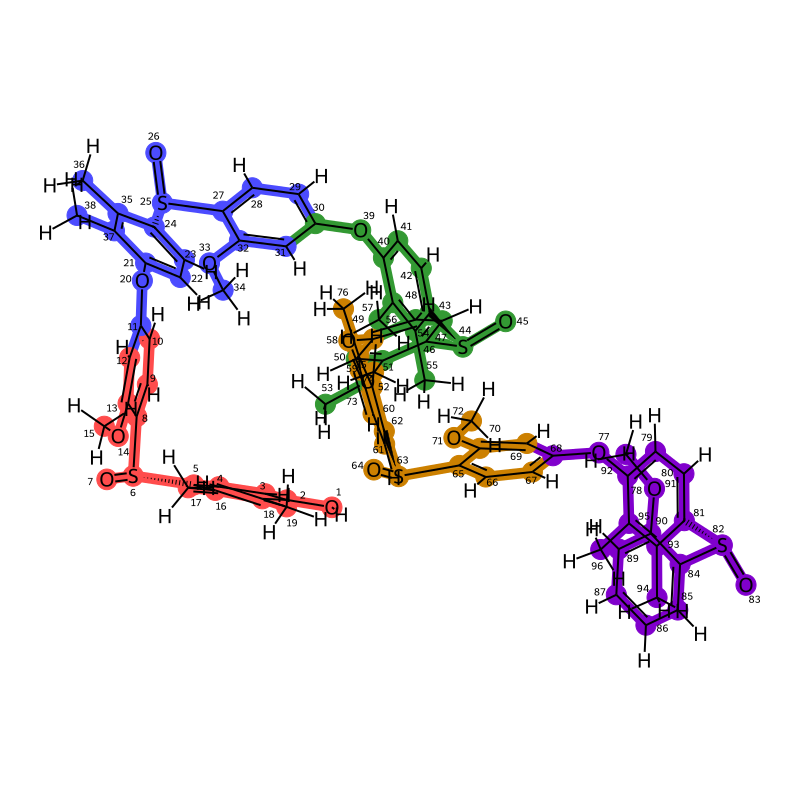

In [7]:
img = visualize_monomer_matches_from_matches(mol_H, matches_H)
if img:
    img.show()

输入匹配数: 5


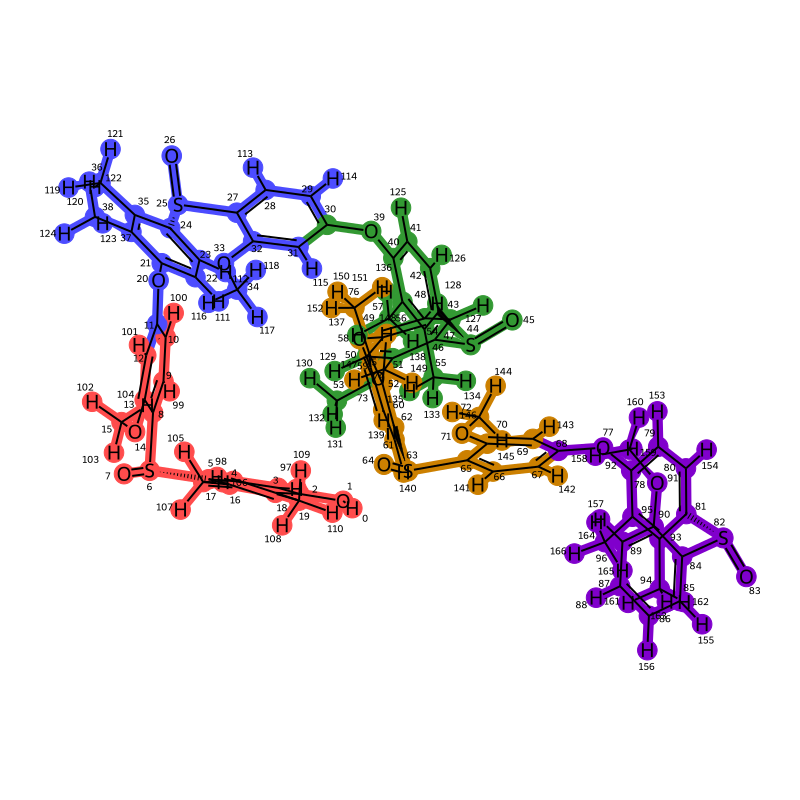

In [8]:
img = visualize_monomer_matches_from_matches(mol_H, matches_with_H)
if img:
    img.show()

In [9]:
matches_with_H

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110],
 [11,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124],
 [30,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138],
 [49,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152],
 [68,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,

In [10]:
import os
from rdkit import Chem
import json
def extract_submol_by_atoms(mol, atom_indices,map_noH_to_H,keypoint_list):
    """
    从mol中提取由atom_indices指定的子分子（包括键），保留3D构象。
    """
    # 创建原子掩码
    amap = {}
    for i, idx in enumerate(atom_indices):
        amap[idx] = i
    n1_H = keypoint_list[0]
    s1_H = keypoint_list[1]
    n2_H = keypoint_list[2]
    s2_H = keypoint_list[3]
    keypoint_list_new = [-1,-1,-1,-1]
    # 创建新分子
    emol = Chem.RWMol()
    for idx in atom_indices:
      
        atom = mol.GetAtomWithIdx(idx)
 
        new_atom = Chem.Atom(atom.GetAtomicNum())

        new_idx  = emol.AddAtom(new_atom)
        if idx == n1_H:
            keypoint_list_new[0]=new_idx
        if idx == s1_H:
            keypoint_list_new[1]=new_idx
        if idx ==n2_H:
            keypoint_list_new[2]=new_idx
        if idx ==s2_H:
            keypoint_list_new[3]=new_idx 

    bond_set = set()
    for bond in mol.GetBonds():
        begin_idx = bond.GetBeginAtomIdx()
        end_idx = bond.GetEndAtomIdx()
        if begin_idx in amap and end_idx in amap:
            bond_type = bond.GetBondType()
            emol.AddBond(amap[begin_idx], amap[end_idx], bond_type)
            bond_set.add((amap[begin_idx], amap[end_idx]))

    submol = emol.GetMol()

    # 添加构象信息
    conf = mol.GetConformer()
    sub_conf = Chem.Conformer(len(atom_indices))
    for i, idx in enumerate(atom_indices):
        pos = conf.GetAtomPosition(idx)
        sub_conf.SetAtomPosition(i, pos)
    submol.RemoveAllConformers()
    submol.AddConformer(sub_conf)

    return submol,keypoint_list_new


def save_monomers_to_sdf(mol_H, matches_with_H, output_dir,keypoint_poly):
    os.makedirs(output_dir, exist_ok=True)
    keypoint_list_file = os.path.join(output_dir,"keypoints.json")
    keypoint_lists = []
    for i, atom_indices in enumerate(matches_with_H):
        atom_indices = sorted(atom_indices)
        submol,keypoint_list_new = extract_submol_by_atoms(mol_H, atom_indices,map_noH_to_H,keypoint_poly[i])
        keypoint_lists.append(keypoint_list_new)
        writer = Chem.SDWriter(os.path.join(output_dir, f'monomer_{i}.sdf'))
        writer.write(submol)
        writer.close()
    with open(keypoint_list_file,"w") as f:
        json.dump(keypoint_lists, f)


monomer_dir = os.path.join(result_folder,"monomers")
save_monomers_to_sdf(mol_H, matches_with_H, monomer_dir,keypoints_poly)

In [11]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
def load_mols_from_files(file_list):
    mols = []
    for f in file_list:
        mol = Chem.MolFromMolFile(f, removeHs=False)
        if mol is None:
            raise ValueError(f"Failed to load: {f}")
        if not mol.GetNumConformers():
            # 构象缺失则使用RDKit生成一个
            AllChem.EmbedMolecule(mol)
        mols.append(mol)
    return mols


def compute_pairwise_rmsd(mols):
    n = len(mols)
    rmsd_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            # 复制 mol[j] 并对齐到 mol[i]
            mol_i = mols[i]
            mol_j = Chem.Mol(mols[j])
            AllChem.AlignMol(mol_j, mol_i)
            conf_i = mol_i.GetConformer()
            conf_j = mol_j.GetConformer()
            rmsd = AllChem.GetBestRMS(mol_i, mol_j)
            rmsd_matrix[i, j] = rmsd
            rmsd_matrix[j, i] = rmsd
    return rmsd_matrix
files = [os.path.join(monomer_dir,f"monomer_{i}.sdf")for i in range(1,4)]
mols = load_mols_from_files(files)
rmsd_matrix = compute_pairwise_rmsd(mols)

print("RMSD matrix:\n", np.round(rmsd_matrix, 3))

RMSD matrix:
 [[0.    1.684 2.027]
 [1.684 0.    1.43 ]
 [2.027 1.43  0.   ]]


In [12]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

def compute_rmsd_matrix_heavy(mols):
    def heavy_indices(mol):
        return [i for i, atom in enumerate(mol.GetAtoms()) if atom.GetAtomicNum() > 1]

    n = len(mols)
    rmsd_mat = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            hi = heavy_indices(mols[i])
            hj = heavy_indices(mols[j])
            if len(hi) != len(hj):
                raise ValueError(f"Heavy atom count mismatch: mol {i} has {len(hi)}, mol {j} has {len(hj)}")
            # 强制转换为标准 Python list of tuples
            atomMap = [(int(a), int(b)) for a, b in zip(hi, hj)]
            rmsd = AllChem.GetBestRMS(mols[i], mols[j], map=atomMap)
            rmsd_mat[i, j] = rmsd
            rmsd_mat[j, i] = rmsd
    return rmsd_mat

print("RMSD matrix:\n", np.round(rmsd_matrix, 3))

RMSD matrix:
 [[0.    1.684 2.027]
 [1.684 0.    1.43 ]
 [2.027 1.43  0.   ]]


In [13]:
from utils.monomer_utils import remove_star_atoms
key_point_list, processed_mol, processed_smi = remove_star_atoms(smiles)
n1,star1,n2,star2 = key_point_list
print(key_point_list) # n1,s1,n2,s2
print(processed_mol.GetNumAtoms())

[1, 0, 11, 12]
21


In [14]:
print(matches_H)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 20, 12, 13, 14, 15, 16, 17, 18, 19], [11, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 39, 31, 32, 33, 34, 35, 36, 37, 38], [30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 58, 50, 51, 52, 53, 54, 55, 56, 57], [49, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 77, 69, 70, 71, 72, 73, 74, 75, 76], [68, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96]]


In [15]:
# compute rigid transformation
conf = mol_H.GetConformer()
from utils.monomer_utils import compute_rigid_frame_from_three_atoms,to_local_coords,to_global_coords,get_positions_from_indices

match_head = matches_H[0]
match_head_s2 = match_head[star2-1] if star1<star2 else match_head[star2]
R_arr = []
t_arr = [np.zeros([3])]
match_head_atom3 = match_head[star2-1] if star1<star2 else match_head[star2]
n2_idx = n2
if star1<n2:
    n2_idx = n2_idx-1
if star2<n2:
    n2_idx = n2_idx-1
match_head_atom2 = match_head[n2_idx]
match_head_atom1 = match_head[n1-1] if star1<n1 else match_head[n1]
R_head,_ = compute_rigid_frame_from_three_atoms(np.array(conf.GetAtomPosition(match_head_atom1)),np.array(conf.GetAtomPosition(match_head_atom2)),np.array(conf.GetAtomPosition(match_head_atom3)))
R_arr.append(R_head)
for idx in range(1,len(matches_H)-1):
    n1, star1, n2, star2 = key_point_list
    n1_atom_idx = matches_H[idx][n1] # atom2
    n2_atom_idx = matches_H[idx][n2] # 
    s1_atom_idx = matches_H[idx][star1] # atom1
    s2_atom_idx = matches_H[idx][star2] # atom3
    x1 = np.array(conf.GetAtomPosition(s1_atom_idx))
    x2 = np.array(conf.GetAtomPosition(n1_atom_idx))
    x3 = np.array(conf.GetAtomPosition(s2_atom_idx))
    t = x2
    R, _ = compute_rigid_frame_from_three_atoms(x1, x2, x3)
    # if idx!=(len(matches_H)-1):   
    #     t_arr.append(t)
    t_arr.append(t)
    R_arr.append(R)

    print(s1_atom_idx,s2_atom_idx)
    # print(f"Monomer {idx}")
    # print("R:\n", R)
    # print("t:", t)
    # print("X_local shape:", X_local.shape)
    # print("Recover error (RMSD):", np.sqrt(((X_recovered - X_global) ** 2).mean()))
match_tail = matches_H[-1]
match_tail_atom3 = match_tail[n2]
match_tail_atom2 = match_tail[n1]
match_tail_atom1 = match_tail[star1]
R_last,_ = compute_rigid_frame_from_three_atoms(np.array(conf.GetAtomPosition(match_tail_atom1)),np.array(conf.GetAtomPosition(match_tail_atom2)),np.array(conf.GetAtomPosition(match_tail_atom3)))
R_arr.append(R_last)
t_arr.append(np.array(conf.GetAtomPosition(match_tail[n1])))


11 39
30 58
49 77


In [16]:
# compute local coords
 
for idx in range(0,len(matches_H)):
    atom_indices = filled_index_clean[idx]
    X_global = get_positions_from_indices(conf, atom_indices)
    X_local = to_local_coords(X_global, R_arr[idx], t_arr[idx])
    X_recovered = to_global_coords(X_local, R_arr[idx], t_arr[idx])

In [17]:
# load monomers
from utils.monomer_utils import backbone2full,expand_with_attached_H
monomer_dir = os.path.join(result_folder,"monomers")
monomer_all_files = []
mols_all_H = []
mols_all_noH = []
map_noH_to_Hs = []
map_H_to_noHs = []
sdf_list = sorted(os.listdir(monomer_dir))
for item in sdf_list:
    if item.endswith(".sdf"):
        monomer_file = os.path.join(monomer_dir,item)
        monomer_all_files.append(monomer_file)
        suppl = Chem.SDMolSupplier(monomer_file, removeHs=False,sanitize=False)
        mol_H = suppl[0]
        mol_noH = Chem.RemoveHs(mol_H)
        mols_all_H.append(mol_H)
        mols_all_noH.append(mol_noH)
        map_noH_to_H = backbone2full(mol_H,mol_noH)
        map_H_to_noH = {v:k for k,v in map_noH_to_H.items()}
        map_noH_to_Hs.append(map_noH_to_H)
        map_H_to_noHs.append(map_H_to_noH)
print(sdf_list)

['R_arr.npy', 'keypoints.json', 'monomer_0.sdf', 'monomer_1.sdf', 'monomer_2.sdf', 'monomer_3.sdf', 'monomer_4.sdf', 't_arr.npy']


[*]Oc1ccc(S(=O)c2ccc([*])cc2OC)c(C)c1C COc1ccc(S(=O)c2ccc(O)cc2OC)c(C)c1C
总原子数（显式）： 35
各原子隐式氢总数： 0


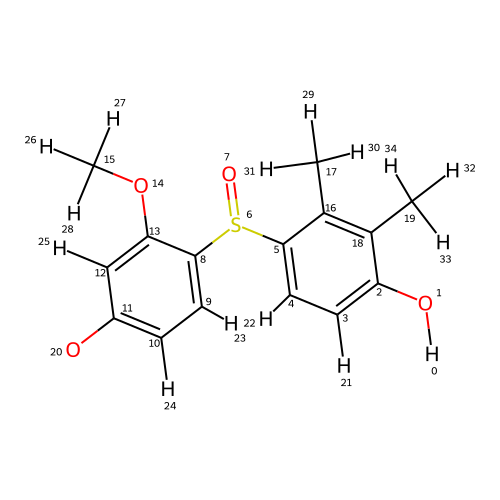

In [ ]:
from rdkit.Chem import Draw, rdDepictor
import io
mol = mols_all_H[0]
# mol = mols_all_noH[0]
print(smiles,processed_smi)
mol = Chem.MolFromSmiles(smiles)
# 2. 遍历清零隐式氢并禁止再自动添加
for atom in mol.GetAtoms():
    atom.SetNoImplicit(True)
    atom.SetNoImplicit(True)

# 3. 更新缓存，确保后续操作不会再补隐式氢
mol.UpdatePropertyCache()
print('总原子数（显式）：', mol.GetNumAtoms())
print('各原子隐式氢总数：', sum(a.GetNumImplicitHs() for a in mol.GetAtoms()))
mol2d = Chem.Mol(mol)            # mol 是你原本带 3D 的 Mol
mol2d.RemoveAllConformers()
Chem.RemoveStereochemistry(mol2d)  # 会清除所有 R/S、E/Z 等手性信息

# 创建一个 2D 绘图器 (Cairo backend)
width, height = 500, 500
drawer = rdMolDraw2D.MolDraw2DCairo(width, height)

# 获取绘图选项并启用原子编号
opts = drawer.drawOptions()
opts.addAtomIndices = True   # 显示 Atom Index
rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol2d)
drawer.FinishDrawing()

# 将绘图结果转为 PIL Image 并显示
png_data = drawer.GetDrawingText()
img = Image.open(io.BytesIO(png_data))
img.show()

In [19]:
from rdkit import Chem
from rdkit.Chem import rdchem
import json
import os
from utils.monomer_utils import compose_monomers

keypoints_json_path = os.path.join(result_folder,"monomers","keypoints.json")
merged_mol, atom_map = compose_monomers(
    mols_all_H=mols_all_H,
    mols_all_noH=mols_all_noH,
    map_noH_to_Hs=map_noH_to_Hs,
    keypoints_json_path=keypoints_json_path
)

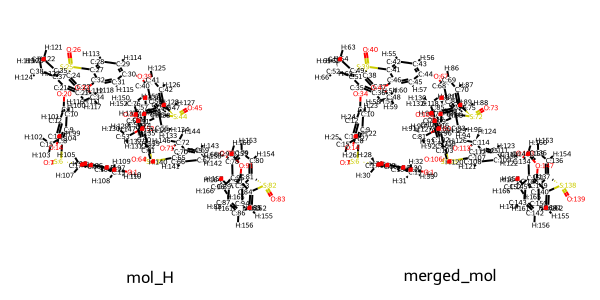

In [20]:
from rdkit import Chem
from rdkit.Chem import Draw
mol_H  = Chem.MolFromMolFile(sdf_file, removeHs=False)  # 保留H

def annotate_atoms(mol):
    mol = Chem.Mol(mol)  # 拷贝
    for atom in mol.GetAtoms():
        atom.SetProp("molAtomMapNumber", str(atom.GetIdx()))
    return mol

mol_H_annot = annotate_atoms(mol_H)
merged_mol_annot = annotate_atoms(merged_mol)

img = Draw.MolsToGridImage(
    [mol_H_annot, merged_mol_annot],
    molsPerRow=2,
    subImgSize=(300, 300),
    legends=["mol_H", "merged_mol"]
)


img  # 在 Jupyter Notebook 中自动显示


In [21]:
from rdkit import Chem
from collections import Counter

def count_bond_types(mol):
    bond_types = [bond.GetBondType() for bond in mol.GetBonds()]
    return Counter(bond_types)

# 统计 mol_H 和 merged_mol 中的键类型数量
bond_counts_H = count_bond_types(mol_H)
bond_counts_merged = count_bond_types(merged_mol)

print("mol_H bond type counts:")
for k, v in bond_counts_H.items():
    print(f"  {k}: {v}")

print("\nmerged_mol bond type counts:")
for k, v in bond_counts_merged.items():
    print(f"  {k}: {v}")


mol_H bond type counts:
  SINGLE: 111
  AROMATIC: 60
  DOUBLE: 5

merged_mol bond type counts:
  SINGLE: 111
  AROMATIC: 60
  DOUBLE: 5


In [22]:
print(atom_map)

{(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (0, 4): 4, (0, 5): 5, (0, 6): 6, (0, 7): 7, (0, 8): 8, (0, 9): 9, (0, 10): 10, (0, 11): 11, (0, 12): 12, (0, 13): 13, (0, 14): 14, (0, 15): 15, (0, 16): 16, (0, 17): 17, (0, 18): 18, (0, 19): 19, (0, 21): 20, (0, 22): 21, (0, 23): 22, (0, 24): 23, (0, 25): 24, (0, 26): 25, (0, 27): 26, (0, 28): 27, (0, 29): 28, (0, 30): 29, (0, 31): 30, (0, 32): 31, (0, 33): 32, (0, 34): 33, (1, 1): 34, (1, 2): 35, (1, 3): 36, (1, 4): 37, (1, 5): 38, (1, 6): 39, (1, 7): 40, (1, 8): 41, (1, 9): 42, (1, 10): 43, (1, 11): 44, (1, 12): 45, (1, 13): 46, (1, 14): 47, (1, 15): 48, (1, 16): 49, (1, 17): 50, (1, 18): 51, (1, 19): 52, (1, 21): 53, (1, 22): 54, (1, 23): 55, (1, 24): 56, (1, 25): 57, (1, 26): 58, (1, 27): 59, (1, 28): 60, (1, 29): 61, (1, 30): 62, (1, 31): 63, (1, 32): 64, (1, 33): 65, (1, 34): 66, (2, 1): 67, (2, 2): 68, (2, 3): 69, (2, 4): 70, (2, 5): 71, (2, 6): 72, (2, 7): 73, (2, 8): 74, (2, 9): 75, (2, 10): 76, (2, 11): 77, (2, 12): 78, (2, 13): 7